Clustering results without scaling:
   vehicle_serial_no vehicle_type  cluster_no_scale
3                  2    Hatchback                 0
4                  4        Sedan                 0
8                  1    Hatchback                 0
5                  7        Truck                 1
7                 10        Truck                 1
2                  8        Truck                 1
9                  9          SUV                 1
1                  3        Sedan                 2
6                  6          SUV                 2
0                  5          SUV                 2

Clustering results with scaling:
   vehicle_serial_no vehicle_type  cluster_scaled
3                  2    Hatchback               0
8                  1    Hatchback               0
7                 10        Truck               1
2                  8        Truck               1
9                  9          SUV               1
5                  7        Truck               1
0       

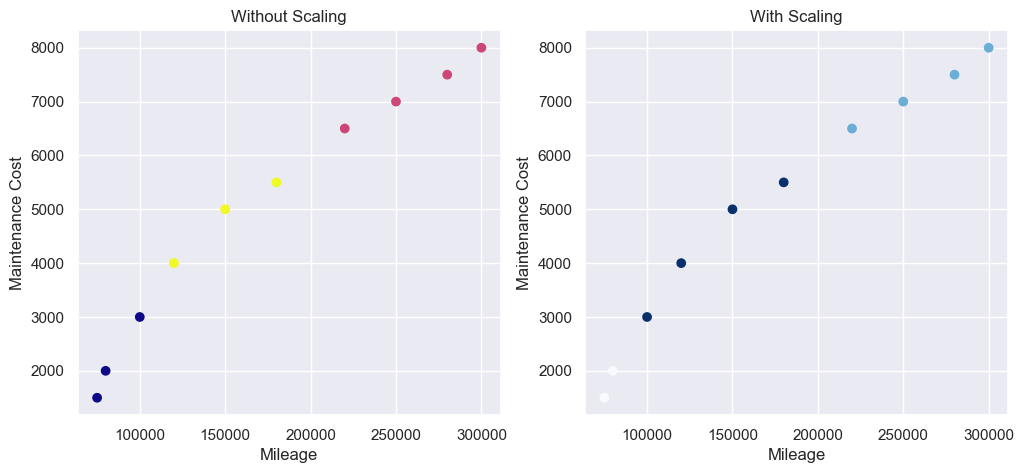

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, LabelEncoder

plt.style.use('dark_background')
sns.set_theme(style="darkgrid")


data = {
    'vehicle_serial_no': [5, 3, 8, 2, 4, 7, 6, 10, 1, 9],
    'mileage': [150000, 120000, 250000, 80000, 100000, 220000, 180000, 300000, 75000, 280000],
    'fuel_efficiency': [15, 18, 10, 22, 20, 12, 16, 8, 24, 9],
    'maintenance_cost': [5000, 4000, 7000, 2000, 3000, 6500, 5500, 8000, 1500, 7500],
    'vehicle_type': ['SUV', 'Sedan', 'Truck', 'Hatchback', 'Sedan', 'Truck', 'SUV', 'Truck', 'Hatchback', 'SUV']
}

df = pd.DataFrame(data)

# Encode categorical variable
le = LabelEncoder()
df['vehicle_type_encoded'] = le.fit_transform(df['vehicle_type'])

X = df[['mileage', 'fuel_efficiency', 'maintenance_cost', 'vehicle_type_encoded']]

kmeans = KMeans(n_clusters=3, random_state=42)
clusters_no_scale = kmeans.fit_predict(X)

scaler = StandardScaler()
X_scaled = X.copy()
cols_to_scale = ['mileage', 'fuel_efficiency', 'maintenance_cost']
X_scaled[cols_to_scale] = scaler.fit_transform(X_scaled[cols_to_scale])

kmeans_scaled = KMeans(n_clusters=3, random_state=42)
clusters_scaled = kmeans_scaled.fit_predict(X_scaled)

df['cluster_no_scale'] = clusters_no_scale
df['cluster_scaled'] = clusters_scaled

print("Clustering results without scaling:")
print(df[['vehicle_serial_no', 'vehicle_type', 'cluster_no_scale']].sort_values('cluster_no_scale'))

print("\nClustering results with scaling:")
print(df[['vehicle_serial_no', 'vehicle_type', 'cluster_scaled']].sort_values('cluster_scaled'))

# Visualization
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter(df['mileage'], df['maintenance_cost'], c=clusters_no_scale, cmap='plasma')
plt.title('Without Scaling')
plt.xlabel('Mileage')
plt.ylabel('Maintenance Cost')

plt.subplot(1, 2, 2)
plt.scatter(df['mileage'], df['maintenance_cost'], c=clusters_scaled, cmap='Blues')
plt.title('With Scaling')
plt.xlabel('Mileage')
plt.ylabel('Maintenance Cost')
plt.show()